In [30]:
import sys
#Change path specificly to your directories
sys.path.insert(1, '/home/codahead/Fishial/FishialReaserch')

import time
import torch
import os
import cv2
import matplotlib.pyplot as plt
import torchvision.models as models
import numpy as np
from torch import nn
from torch.optim import Optimizer, SGD
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from torchvision import transforms
from sklearn.neighbors import KDTree

from module.classification_package.interpreter_classifier import ClassifierFC
from module.segmentation_package.interpreter_segm import SegmentationInference

from PIL import Image
import numpy as np
import random
import sklearn.metrics.pairwise
import scipy.spatial.distance
import copy
import json
import time
import requests
import warnings
warnings.filterwarnings('ignore')

In [31]:
def get_labels():
    return {0: {'num': '336', 'label': 'Pomatomus saltatrix'},
     1: {'num': '157', 'label': 'Acanthocybium solandri'},
     2: {'num': '94', 'label': 'Carassius auratus'},
     3: {'num': '210', 'label': 'Caranx hippos'},
     4: {'num': '604', 'label': 'Thunnus atlanticus'},
     5: {'num': '436', 'label': 'Perca flavescens'},
     6: {'num': '20', 'label': 'Salvelinus fontinalis'},
     7: {'num': '18', 'label': 'Oncorhynchus mykiss'},
     8: {'num': '383', 'label': 'Esox lucius'},
     9: {'num': '11', 'label': 'Pterois volitans'},
     10: {'num': '10', 'label': 'Sphyraena barracuda'},
     11: {'num': '529', 'label': 'Lepomis macrochirus'},
     12: {'num': '703', 'label': 'Pogonias cromis'},
     13: {'num': '248', 'label': 'Sciaenops ocellatus'},
     14: {'num': '416', 'label': 'Lepomis gulosus'},
     15: {'num': '684', 'label': 'Esox masquinongy'},
     16: {'num': '23', 'label': 'Salmo trutta'},
     17: {'num': '15', 'label': 'Scomberomorus cavalla'},
     18: {'num': '13', 'label': 'Micropterus salmoides'},
     19: {'num': '5', 'label': 'Coryphaena hippurus'},
     20: {'num': '22', 'label': 'Micropterus dolomieu'},
     21: {'num': '91', 'label': 'Balistes capriscus'},
     22: {'num': '16', 'label': 'Thunnus albacares'},
     23: {'num': '247', 'label': 'Megalops atlanticus'},
     24: {'num': '235', 'label': 'Trachinotus falcatus'},
     25: {'num': '14', 'label': 'Morone saxatilis'},
     26: {'num': '237', 'label': 'Seriola dumerili'},
     27: {'num': '356', 'label': 'Caranx crysos'},
     28: {'num': '658', 'label': 'Lutjanus vivanus'},
     29: {'num': '234', 'label': 'Scomberomorus maculatus'},
     30: {'num': '162', 'label': 'Rachycentron canadum'},
     31: {'num': '29', 'label': 'Amphiprion percula'},
     32: {'num': '252', 'label': 'Haemulon sciurus'},
     33: {'num': '347', 'label': 'Lutjanus synagris'},
     34: {'num': '129', 'label': 'Lutjanus campechanus'},
     35: {'num': '24', 'label': 'Istiophorus albicans'},
     36: {'num': '388', 'label': 'Cynoscion nebulosus'},
     37: {'num': '217', 'label': 'Elops saurus'},
     38: {'num': '12', 'label': 'Carcharias taurus'},
     39: {'num': '394', 'label': 'Lutjanus griseus'},
     40: {'num': '159', 'label': 'Cyprinus carpio'},
     41: {'num': '483', 'label': 'Selene vomer'},
     42: {'num': '192', 'label': 'Centropristis striata'},
     43: {'num': '725', 'label': 'Caranx ruber'},
     44: {'num': '221', 'label': 'Epinephelus morio'},
     45: {'num': '245', 'label': 'Amphiprion ocellaris'},
     46: {'num': '17', 'label': 'Carcharodon carcharias'},
     47: {'num': '449', 'label': 'Chaetodipterus faber'},
     48: {'num': '481', 'label': 'Mycteroperca microlepis'},
     49: {'num': '676', 'label': 'Lagodon rhomboides'},
     50: {'num': '712', 'label': 'Archosargus probatocephalus'},
     51: {'num': '230', 'label': 'Lobotes surinamensis'},
     52: {'num': '276', 'label': 'Xiphias gladius'},
     53: {'num': '100', 'label': 'Pomoxis nigromaculatus'},
     54: {'num': '115', 'label': 'Sander vitreus'},
     55: {'num': '21', 'label': 'Rhincodon typus'},
     56: {'num': '696', 'label': 'Oncorhynchus kisutch'},
     57: {'num': '142', 'label': 'Katsuwonus pelamis'},
     58: {'num': '251', 'label': 'Euthynnus alletteratus'},
     59: {'num': '2', 'label': 'Lutjanus analis'},
     60: {'num': '51', 'label': 'Cyprinus rubrofuscus'}}

In [50]:
model_segmentation = SegmentationInference('../../best_scores/model_0067499_amp_on-Copy1.pth')
model_classifier = ClassifierFC('../../../output/final_cross_cross_entropy_0.9911714770797962_257982.0.ckpt')

In [57]:
images = ['https://www.howtocatchanyfish.com/uploads/8/8/0/2/8802125/3393454.jpg?837']

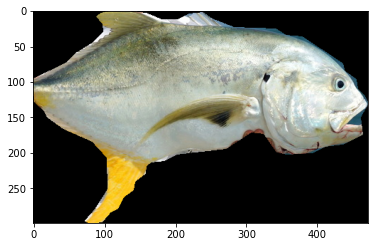

[{'name': 'Caranx hippos', 'accuracy': 1.0}, {'name': 'Trachinotus falcatus', 'accuracy': 0.0}, {'name': 'Seriola dumerili', 'accuracy': 0.0}, {'name': 'Sciaenops ocellatus', 'accuracy': 0.0}, {'name': 'Pomatomus saltatrix', 'accuracy': 0.0}, {'name': 'Coryphaena hippurus', 'accuracy': 0.0}]


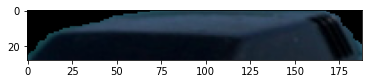

[{'name': 'Sphyraena barracuda', 'accuracy': 0.993}, {'name': 'Istiophorus albicans', 'accuracy': 0.007}, {'name': 'Esox masquinongy', 'accuracy': 0.001}, {'name': 'Acanthocybium solandri', 'accuracy': 0.0}, {'name': 'Esox lucius', 'accuracy': 0.0}, {'name': 'Euthynnus alletteratus', 'accuracy': 0.0}]


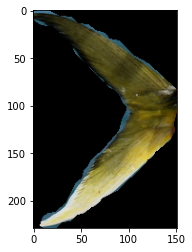

[{'name': 'Coryphaena hippurus', 'accuracy': 0.999}, {'name': 'Perca flavescens', 'accuracy': 0.001}, {'name': 'Carcharias taurus', 'accuracy': 0.0}, {'name': 'Scomberomorus maculatus', 'accuracy': 0.0}, {'name': 'Istiophorus albicans', 'accuracy': 0.0}, {'name': 'Caranx hippos', 'accuracy': 0.0}]


In [58]:
softmax = nn.Softmax(dim=None)
tmp_path_to_save = "tmp_path_img.png"
labels = get_labels()
for img_url in images:
    r = requests.get(img_url, allow_redirects=True)  # to get content after redirection
    with open(tmp_path_to_save, 'wb') as f:
        f.write(r.content)
    try:
        img = cv2.imread(tmp_path_to_save)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    except:
        continue
    
    array, masks = model_segmentation.simple_inference(img)
    
    results = []
    output = model_classifier.batch_inference(masks, top_k = 6)

    for idx, single in enumerate(output):
        dict_single = {
            'shape': array[idx]
        }
        
        plt.imshow(masks[idx])
        plt.show()
        species = [
            {'name': labels[match[0]]['label'],
             'accuracy': match[1]} for match in single
        ]
        print(species)

        dict_single.update({'species': species})
        results.append(dict_single)
        

In [23]:
model_segmentation.re_init_model(0.8)